## Intro

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import median_abs_deviation as mad
import time

Useful function for the plot

In [65]:
def display_band(X, par, epsi=0.001, col="k"):
    x1 = np.min(X[0, :])
    x2 = np.max(X[0, :])
    y1 = np.min(X[1, :])
    y2 = np.max(X[1, :])

    # extend the line for the k# of its lenght
    k = 0.01
    dx = x2 - x1
    dy = y2 - y1
    l = np.sqrt(dx**2 + dy**2)
    x1 = x1 - k * l
    x2 = x2 + k * l
    y1 = y1 - k * l
    y2 = y2 + k * l
    ##
    if np.abs(par[1]) < 2e-2:
        # disp('vertical line')
        a = np.vstack([-(par[1] * y1 + par[2]) / par[0], y1])
        b = np.vstack([-(par[1] * y2 + par[2]) / par[0], y2])
    else:
        a = np.vstack([x1, -(par[0] * x1 + par[2]) / par[1]])
        b = np.vstack([x2, -(par[0] * x2 + par[2]) / par[1]])

    if np.abs(par[0]) < 1e-5:
        v = np.array([0, 1])
    else:
        v = np.array([1, par[1] / par[0]])  # direction perpendicular to the line;

    v = v / np.sqrt(np.sum(v**2))
    # corners of the bands
    v = v[:, np.newaxis]
    a1 = a - epsi * v
    a2 = a + epsi * v
    b1 = b - epsi * v
    b2 = b + epsi * v

    px = np.array([a1[0], b1[0], b2[0], a2[0]]).squeeze()
    py = np.array([a1[1], b1[1], b2[1], a2[1]]).squeeze()
    plt.tricontourf(px, py, np.ones_like(px), colors=col, alpha=0.5)
    plt.gca().set_aspect("equal")

Function that computes the residual between points and a line

In [8]:
def res_line(X, M):
    if len(M.shape) > 1:
        num_lines = M.shape[1]
    else:
        num_lines = 1

    if num_lines == 1:
        d = np.abs(M[0] * X[0, :] + M[1] * X[1, :] + M[2])
    else:
        n = X.shape[1]
        d = np.zeros((n, num_lines))
        for i in range(num_lines):
            d[:, i] = np.abs(M[0, i] * X[0, :] + M[1, i] * X[1, :] + M[2, i])

## OLS y DLT

Implement the following function, that computes the solution of the overdetermined system

$$\underset{A}{\text{argmin}} \| A\mathbf x - \mathbf y\|_2^2$$

via OLS and DLT

The input $P=[[x_1, y_1], \dots,[x_N,y_N]]$ collects the points where the line $y = mx+q$ should pass through


In [87]:
def fit_line_ols(P):
    # design matrix
    ones_column = np.ones((P.shape[1], 1))
    A = np.concatenate((P.T, ones_column), axis=1) # A = [[x1,y1,1],[x2,y2,1],...,[xn,yn,1]]
    X = A[:, [0, 2]]  # X = [[x1,1],[x2,1],...,[xn,1]]

    # vector of responses
    y = A[:, 1]

    # straight line coefficient
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

    residuals = y - (X @ theta)
    residual_error = np.sum(residuals**2)
    return theta, residuals, residual_error

In [72]:
def fit_line_dlt(P):
    # design matrix
    ones_column = np.ones((P.shape[1], 1))
    A = np.concatenate((P.T, ones_column), axis=1) # A = [[x1,y1,1],[x2,y2,1],...,[xn,yn,1]]
    
    # vector of responses
    y = P.T[:, 1]

    _, _, V = np.linalg.svd(A, full_matrices=False)

    theta = V[:, -1]
    print(theta.shape)
    residuals = A @ theta
    residual_error = np.sum(residuals**2)

    return theta, residuals, residual_error

Robust Fitting Methods
----------------------
Implements the following methods:

In [ ]:
def simpleRANSAC(X, eps, cardmss=2):
    """
    SIMPLERANSAC - Robust fit with the LMEDS algorithm
    X: matrix containing (x,y) coordinates of shape [num_features x num_samples]
    """
    # number of samples in the dataset
    n = X.shape[1]
    # Desired probability of success
    alpha = 0.99

    # Pessimistic estimate of inliers fraction
    f = 0.5

    # set maximum number of iterations
    # MaxIterations =

    # set maximum consensus reached
    # maxscore =

    for i in range(MaxIterations):

        # Generate cardmss random indices in the range 0..n-1
        rand_choice = np.random.choice(n, cardmss, replace=False)
        mss = X[:, rand_choice]

        # Fit model to this minimal sample set.
        # theta =

        # Evaluate distances between points and model
        # sqres =

        # identify inliers: consensus set
        # inliers =

        # assess consensus (the number of inliers)
        # score =

        # replace maxscore, bestinliers and bestmodel if needed
        # maxscore =
        # bestinliers =
        # bestmodel =

    return bestmodel, bestinliers

In [ ]:
def simpleMSAC(X, eps, cardmss=2):
    n = X.shape[1]
    alpha = 0.99  # Desired probability of success
    f = 0.5  # Pessimistic estimate of inliers fraction

    # set maximum number of iterations
    # MaxIterations =

    # set maximum consensus reached
    # mincost =

    for i in range(MaxIterations):
        # Generate cardmss random indices in the range 0..n-1
        # mss =

        # Fit model to this minimal sample set.
        # theta =

        # Evaluate distances between points and model
        # sqres =

        # identify inliers: consensus set
        inliers = np.where(sqres <= eps)[0]

        # Compute MSAC score
        # cost =

        # replace mincost, bestinliers and bestmodel if needed
        #  mincost =
        #  bestinliers =
        #  bestmodel =

    return bestmodel, bestinliers

In [ ]:
def simpleLMEDS(X, cardmss=2):
    n = X.shape[1]
    alpha = 0.99  # Desired probability of success
    f = 0.5  # Pessimistic estimate of inliers fraction

    # set maximum number of iterations
    # MaxIterations =

    # set maximum consensus reached
    # mincost =

    for i in range(MaxIterations):
        # Generate cardmss random indicies in the range 0..n-1
        # mss =

        # Fit model to this minimal sample set.
        # theta =

        # Evaluate distances between points and model
        # sqres =

        # Compute LMS score
        # cost =

        # define inliner threshold (does make sense only when the model provides a good fit)
        # compute the standard deviation of distances (you can use MAD)
        # scale =

        # instead of 3-sigma rule, we do 2.5-sigma rule. sqres is already squares
        inliers = np.where(sqres < 2.5 * scale)[0]

        # replace mincost, bestinliers and bestmodel if needed
        # mincost =
        # bestinliers =
        # bestmodel =

    return bestmodel, bestinliers

Fitting over noisy data
-----------------------
Set the parameters and generate the dataset

In [73]:
cardmss = 2  # minimum number of points required to fit a model

# plotting params
BAND_WIDTH = 0.05
BAND_COLOR = "b"

# create noisy dataset
x = np.linspace(0, 1, 100)
y = 1.5 * x + 1
X = np.vstack((x, y))
sigma = 0.01
X = X + sigma * np.random.normal(size=X.shape)

Least square fit to noisy data

(2,)
(100,)


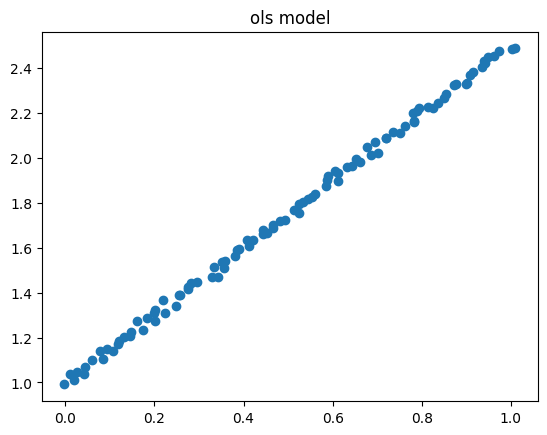

In [93]:
model_OLS = fit_line_ols(X)
print(model_OLS[0].shape)
print(model_OLS[1].shape)
plt.figure()
plt.scatter(X[0, :], X[1, :])
# plt.plot([0, 1], [model_OLS[1], model_OLS[0] + model_OLS[1]], "violet", linewidth=3) #doesnt work (theta = 2 rows) (residual = 100 rows)
plt.title("ols model")
plt.show()

Least square fit via DLT (different model parametrization)

(3,)


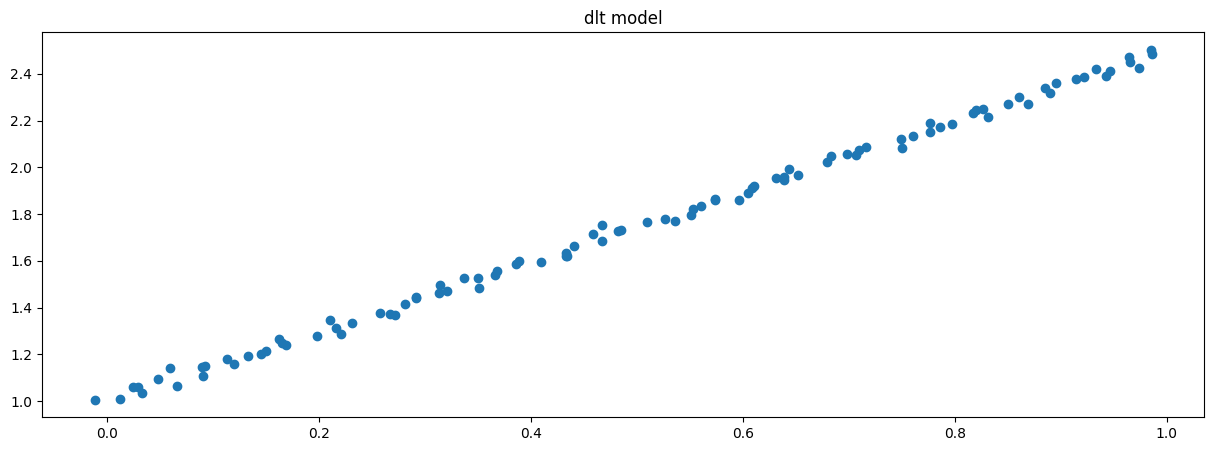

In [64]:
model_DLT = fit_line_dlt(X)
plt.figure(figsize=(15, 5))
plt.scatter(X[0, :], X[1, :])
# display_band(X, model_DLT, BAND_WIDTH, BAND_COLOR) # doesn't work
plt.title("dlt model")
plt.show()

Add a single outlier to the data, obtaining a new dataset $X_{out}$

In [ ]:
# X_out =

Least square fit to noisy data with a single outlier

In [ ]:
# model_OLS =
plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
plt.plot([0, 1], [model_OLS[1], model_OLS[0] + model_OLS[1]], "violet", linewidth=3)
plt.title("ls model")
plt.show()

Least square fit via DLT to noisy data with a single outlier

In [ ]:
# model_DLT =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
display_band(X_out, model_DLT, BAND_WIDTH, BAND_COLOR)
plt.title("dlt model with outliers")
plt.show()

Add many outliers to the noisy data

In [ ]:
n_out = 50
# X_out =

Least square fit

In [ ]:
# model_OLS =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
plt.plot([0, 1], [model_OLS[1], model_OLS[0] + model_OLS[1]], "violet", linewidth=3)
plt.title("ls model")
plt.show()

Least square via DLT

In [ ]:
# model_DLT =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
display_band(X_out, model_DLT, BAND_WIDTH, BAND_COLOR)
plt.title("noisy and outlier contaminated data")
plt.show()

Robust Fitting methods
----------------------
Use Ransac, M-Sac and L-Meds to perform fitting on data with many outliers

Ransac:


In [ ]:
epsi = 3 * sigma  # define inlier threshold

# invoke simpleRANSAC
# bestmodel, bestinliers =

# refine model estimates
# refinedModel =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
display_band(X_out, refinedModel, epsi, BAND_COLOR)
plt.title("ransac model")
plt.show()

M-Sac:

In [ ]:
# bestmodel, bestinliers =

# refine model estimates
# refinedModel =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
display_band(X_out, refinedModel, epsi, BAND_COLOR)
plt.title("MSAC model")
plt.show()

L-Meds:

In [ ]:
# invoke simpleLMEDS
# bestmodel, bestinliers =

# refine model estimates
# refinedModel =

plt.figure()
plt.scatter(X_out[0, :], X_out[1, :])
display_band(X_out, refinedModel, epsi, BAND_COLOR)
plt.title("lmeds model")
plt.show()